# 5.1. Binary Classification - Wine Dataset
* "시작하세요! 텐서플로우 2.0 프로그래밍", 5.1. 이항 분류, pp. 106-123

## Wine Dataset
머신러닝의 중요한 공개 데이터인 University of California - Irvine (UCI)의 Machine Learning Repository에서 제공하는

Wine Data Set - UCI Machine Learning Repository, https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

를 이용합니다.

링크를 열면 아래와 같이 보입니다.
```
Index of /ml/machine-learning-databases/wine-quality
Parent Directory
winequality-red.csv
winequality-white.csv
winequality.names
Apache/2.4.6 (CentOS) OpenSSL/1.0.2k-fips SVN/1.7.14 Phusion_Passenger/4.0.53 mod_perl/2.0.11 Perl/v5.16.3 Server at archive.ics.uci.edu Port 443
```
이 중 데이터 셋 파일을 다운로드 받아서 쓰거나, 이 파일의 URL을 
* [winequality-red.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv)
* [winequality-white.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv)

각 항목은 콤마 ,가 아닌 ;으로 구별됩니다.

## 문제
주어진 데이터의 속성이 레드와인이냐 화이트 와인이냐로 분류

In [1]:
import pandas as pd

#red = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
#white = pd.read_csv( 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')
red = pd.read_csv( 'dataset/winequality-red.csv', sep=';')
white = pd.read_csv( 'dataset/winequality-white.csv', sep=';')

In [2]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [4]:
red[ 'type' ] = 0
white [ 'type' ] = 1

In [5]:
red.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0


In [6]:
white.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6,1
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6,1


In [7]:
wine = pd.concat( [red, white] )
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


([<matplotlib.axis.XTick at 0x7f6632329c50>,
 <a list of 2 Text major ticklabel objects>)

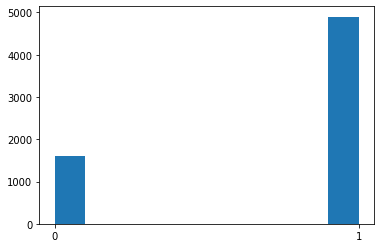

In [8]:
import matplotlib.pyplot as plt

plt.hist( wine['type'] )
plt.xticks( [0,1] )

In [9]:
wine['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

## Data Normalization / 데이터 정규화

In [10]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 710.6 KB


In [11]:
normalized_wine = ( wine - wine.min() ) / ( wine.max() - wine.min() )
normalized_wine.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.297521,0.413333,0.0,0.019939,0.111296,0.034722,0.064516,0.206092,0.612403,0.191011,0.202899,0.333333,0.0
1,0.330579,0.533333,0.0,0.030675,0.147841,0.083333,0.140553,0.186813,0.372093,0.258427,0.260870,0.333333,0.0


In [12]:
normalized_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,0.469730,0.753886
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.145543,0.430779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,0.333333,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,0.500000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,0.500000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


sample()함수는 행을 랜덤하게 뽑아서 새로운 DataFrame을 만듭니다. frac=1은 100%, 모든 데이터를 뽑아서 섞는 것과 동일합니다.

In [13]:
shuffuled_wine = normalized_wine.sample( frac=1 )
shuffuled_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
2431,0.206612,0.140000,0.084337,0.098926,0.059801,0.170139,0.394009,0.164450,0.395349,0.112360,0.144928,0.333333,1.0
1639,0.338843,0.093333,0.295181,0.049080,0.054817,0.086806,0.228111,0.113553,0.294574,0.095506,0.362319,0.333333,1.0
3273,0.214876,0.100000,0.192771,0.019939,0.048173,0.135417,0.258065,0.069983,0.465116,0.174157,0.550725,0.666667,1.0
3560,0.231405,0.373333,0.168675,0.058282,0.038206,0.062500,0.165899,0.062657,0.302326,0.224719,0.710145,0.500000,1.0
3584,0.297521,0.113333,0.168675,0.101994,0.031561,0.045139,0.165899,0.101600,0.170543,0.084270,0.507246,0.666667,1.0


첫번째 열의 Index값이 974, 815 등으로 섞여있음을 알 수 있습니다. 마지막 열의 type의 값이 0.0, 1.0 등으로 두 개 클래스가 섞여있음도 확인할 수 있습니다.

## Convert to Numpy Array


In [14]:
shuffuled_wine_np = shuffuled_wine.to_numpy()
shuffuled_wine_np[:5]

array([[0.20661157, 0.14      , 0.08433735, 0.09892638, 0.05980066,
        0.17013889, 0.39400922, 0.16444959, 0.39534884, 0.11235955,
        0.14492754, 0.33333333, 1.        ],
       [0.33884298, 0.09333333, 0.29518072, 0.04907975, 0.05481728,
        0.08680556, 0.2281106 , 0.11355311, 0.29457364, 0.09550562,
        0.36231884, 0.33333333, 1.        ],
       [0.21487603, 0.1       , 0.19277108, 0.01993865, 0.04817276,
        0.13541667, 0.25806452, 0.06998265, 0.46511628, 0.1741573 ,
        0.55072464, 0.66666667, 1.        ],
       [0.23140496, 0.37333333, 0.1686747 , 0.05828221, 0.03820598,
        0.0625    , 0.16589862, 0.06265664, 0.30232558, 0.2247191 ,
        0.71014493, 0.5       , 1.        ],
       [0.29752066, 0.11333333, 0.1686747 , 0.10199387, 0.03156146,
        0.04513889, 0.16589862, 0.10160015, 0.17054264, 0.08426966,
        0.50724638, 0.66666667, 1.        ]])

In [15]:
train_test_ratio = 0.8
train_index = int( len(shuffuled_wine_np) * train_test_ratio )

In [16]:
train_index

5197

In [17]:
train_x, train_y = shuffuled_wine_np[ :train_index, :-1 ], shuffuled_wine_np[ :train_index, -1 ]
test_x, test_y = shuffuled_wine_np[train_index:, :-1], shuffuled_wine_np[train_index:, -1 ]

In [18]:
train_y[0], test_y[0]

(1.0, 0.0)

In [19]:
type( train_y )

numpy.ndarray

In [20]:
temp_y = train_y.astype( int )

In [23]:
import tensorflow as tf

tf.__version__

'2.0.0'

In [24]:
# One-hot encoding
train_y = tf.keras.utils.to_categorical( train_y, num_classes=2 )
test_y = tf.keras.utils.to_categorical( test_y, num_classes=2 )

In [25]:
model = tf.keras.Sequential( [
    tf.keras.layers.Dense( units=48, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense( units=24, activation='relu' ),
    tf.keras.layers.Dense( units=12, activation='relu' ),
    tf.keras.layers.Dense( units=2, activation='softmax' )
])

In [26]:
model.compile( optimizer=tf.keras.optimizers.Adam( lr=0.07 ), loss='categorical_crossentropy', metrics=[ 'accuracy' ] )

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 48)                624       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                1176      
_________________________________________________________________
dense_2 (Dense)              (None, 12)                300       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 26        
Total params: 2,126
Trainable params: 2,126
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model.fit( train_x, train_y, epochs=25, batch_size=32, validation_split=0.25 )

Train on 3897 samples, validate on 1300 samples
Epoch 1/25
3897/3897 [==============================] - 1s 215us/sample - loss: 0.1561 - accuracy: 0.9433 - val_loss: 0.1187 - val_accuracy: 0.9762
Epoch 2/25
3897/3897 [==============================] - 0s 58us/sample - loss: 0.0481 - accuracy: 0.9877 - val_loss: 0.1020 - val_accuracy: 0.9823
Epoch 3/25
3897/3897 [==============================] - 0s 55us/sample - loss: 0.0490 - accuracy: 0.9856 - val_loss: 0.0739 - val_accuracy: 0.9854
Epoch 4/25
3897/3897 [==============================] - 0s 53us/sample - loss: 0.0533 - accuracy: 0.9846 - val_loss: 0.0868 - val_accuracy: 0.9838
Epoch 5/25
3897/3897 [==============================] - 0s 56us/sample - loss: 0.0395 - accuracy: 0.9895 - val_loss: 0.1249 - val_accuracy: 0.9831
Epoch 6/25
3897/3897 [==============================] - 0s 65us/sample - loss: 0.0483 - accuracy: 0.9882 - val_loss: 0.3347 - val_accuracy: 0.9200
Epoch 7/25
3897/3897 [==============================] - 0s 58us/sampl

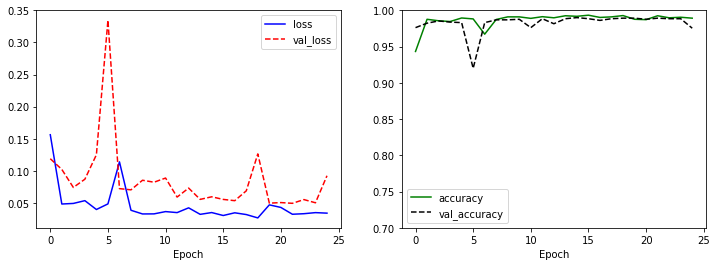

In [34]:
import matplotlib.pyplot as plt

plt.figure( figsize=(12,4) )
plt.subplot( 1,2, 1 )
plt.plot( history.history['loss'], 'b-', label='loss' )
plt.plot( history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot( history.history['accuracy'], 'g-', label='accuracy' )
plt.plot( history.history['val_accuracy'], 'k--', label='val_accuracy' )
plt.xlabel('Epoch')
plt.ylim( 0.7,1 )
plt.legend()

plt.show()

In [35]:
model.evaluate( test_x, test_y )

1300/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.06947300636424468, 0.9823077]